Colab Link: https://colab.research.google.com/drive/14xlNqERSdLhnjwonUT-CAfNgtji6Cloi





**Summary**

In this paper we will analyse a list of 178 wines split into 3 customer segments with different wine taste. The dataset has different wines characteristics and we will build a model that will be able to define in which customer segment a certain wine has to be categorised.

To do so we will use the Principal Component Analysis and the Linear Discriminant Analysis. Both are linear transformation techniques whereas the Principal Component Analysis is unsupervised and the Linear Discriminant Analysis supervised. We will use 80% of the data to train the model and 20% to test the model.

**Set Environment**


In [1]:
#set R environment
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [2]:

install.packages('caTools')
install.packages('caret')
install.packages('e1071')
install.packages('ElemStatLearn')
install.packages('MASS')
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ElemStatLearn’ is not available (for R version 3.6.3)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(caTools) # for feature scaling
library(caret)# to use preprocess function
library(e1071) # for SVM
#library(ElemStatLearn) # for plotting
library(MASS) # to apply LDA
library(car)
set.seed(123)

Loading required package: lattice

Loading required package: ggplot2

Loading required package: carData



**Extract and transform**

In [0]:
urltrain <- "https://raw.githubusercontent.com/charlesdethibault/my-library/master/datasets/wine.csv"
filename <- "wine.csv"
tmp <- tempfile()
if(!file.exists(filename))download.file(urltrain, destfile = filename)
df <- read.csv(filename, na.strings=c("", "NA", "#DIV/0!"))



In [5]:
head(df,1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1


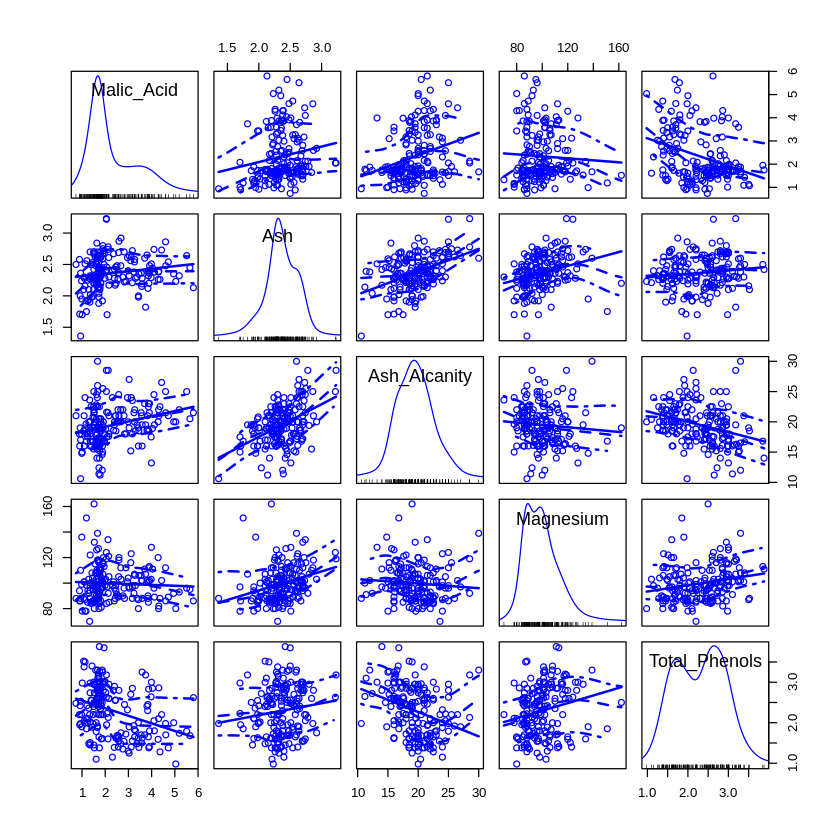

In [6]:
scatterplotMatrix(df[2:6])

In [0]:
#split data
split = sample.split(df$Customer_Segment, SplitRatio = 0.8)
training_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)
# feature scale
training_set[-14] = scale(training_set[-14])
test_set[-14] = scale(test_set[-14])

**PCA**

In [0]:
pca = preProcess(x = training_set[-14], method = 'pca', pcaComp = 2)
training_set_pca = predict(pca, training_set)
training_set_pca = training_set_pca[c(2, 3, 1)]
test_set_pca = predict(pca, test_set)
test_set_pca = test_set_pca[c(2, 3, 1)]
# Fitting SVM to the Training set
classifier_pca = svm(formula = Customer_Segment ~ .,
                 data = training_set_pca,
                 type = 'C-classification',
                 kernel = 'linear')
# Predicting the Test set results
y_pred_pca = predict(classifier_pca, newdata = test_set_pca[-3])
# Create the Confusion Matrix
cm_pca = table(test_set_pca[, 3], y_pred_pca)

**LDA**

In [9]:
df.lda <- lda(Customer_Segment ~ ., data=df)
df.lda

Call:
lda(Customer_Segment ~ ., data = df)

Prior probabilities of groups:
        1         2         3 
0.3314607 0.3988764 0.2696629 

Group means:
   Alcohol Malic_Acid      Ash Ash_Alcanity Magnesium Total_Phenols Flavanoids
1 13.74475   2.010678 2.455593     17.03729  106.3390      2.840169  2.9823729
2 12.27873   1.932676 2.244789     20.23803   94.5493      2.258873  2.0808451
3 13.15375   3.333750 2.437083     21.41667   99.3125      1.678750  0.7814583
  Nonflavanoid_Phenols Proanthocyanins Color_Intensity       Hue    OD280
1             0.290000        1.899322        5.528305 1.0620339 3.157797
2             0.363662        1.630282        3.086620 1.0562817 2.785352
3             0.447500        1.153542        7.396250 0.6827083 1.683542
    Proline
1 1115.7119
2  519.5070
3  629.8958

Coefficients of linear discriminants:
                              LD1           LD2
Alcohol              -0.403399781  0.8717930699
Malic_Acid            0.165254596  0.3053797325
Ash   

In [0]:
lda = lda(formula = Customer_Segment ~ ., data = training_set)
training_set_lda = as.data.frame(predict(lda, training_set))
training_set_lda = training_set_lda[c(5, 6, 1)]
test_set_lda = as.data.frame(predict(lda, test_set)) # we need to set it as dataframe
test_set_lda = test_set_lda[c(5, 6, 1)]
# Fitting SVM to the Training set
classifier_lda = svm(formula = class ~ ., # the predictor is now called "class"" due to dataframe transformation
                 data = training_set_lda,
                 type = 'C-classification',
                 kernel = 'linear')
# Predicting the Test set results
y_pred_lda = predict(classifier_lda, newdata = test_set_lda[-3])
# Making the Confusion Matrix
cm_lda = table(test_set_lda[, 3], y_pred_lda)

**PCA results**

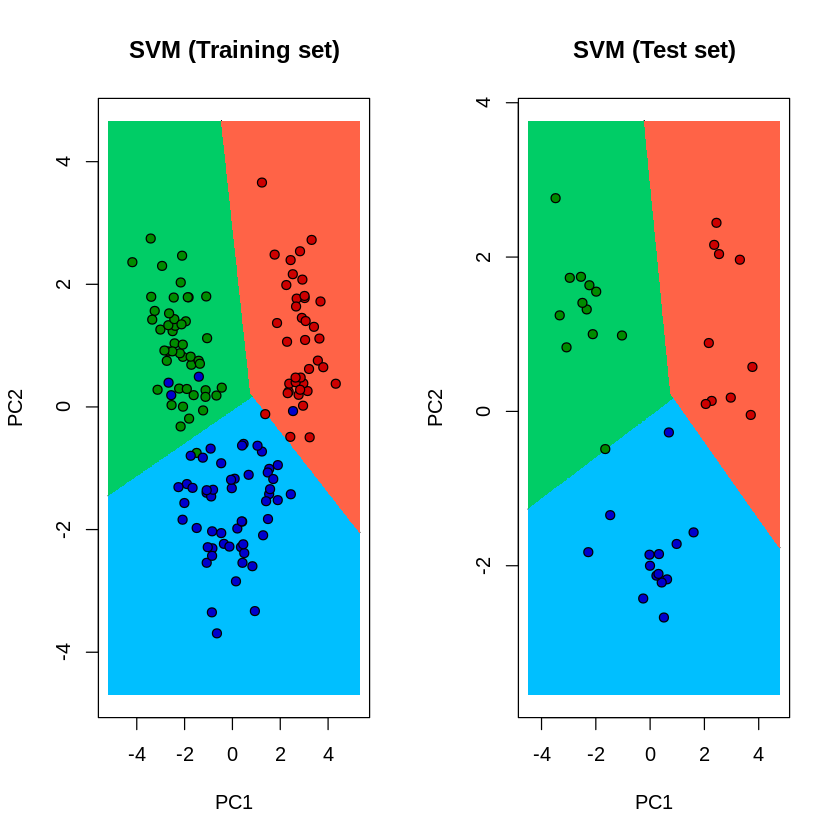

In [11]:
# Visualising the Training set results
par(mfrow=c(1,2))
set = training_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier_pca, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))
# Visualising the Test set results
set = test_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier_pca, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

**LDA results**

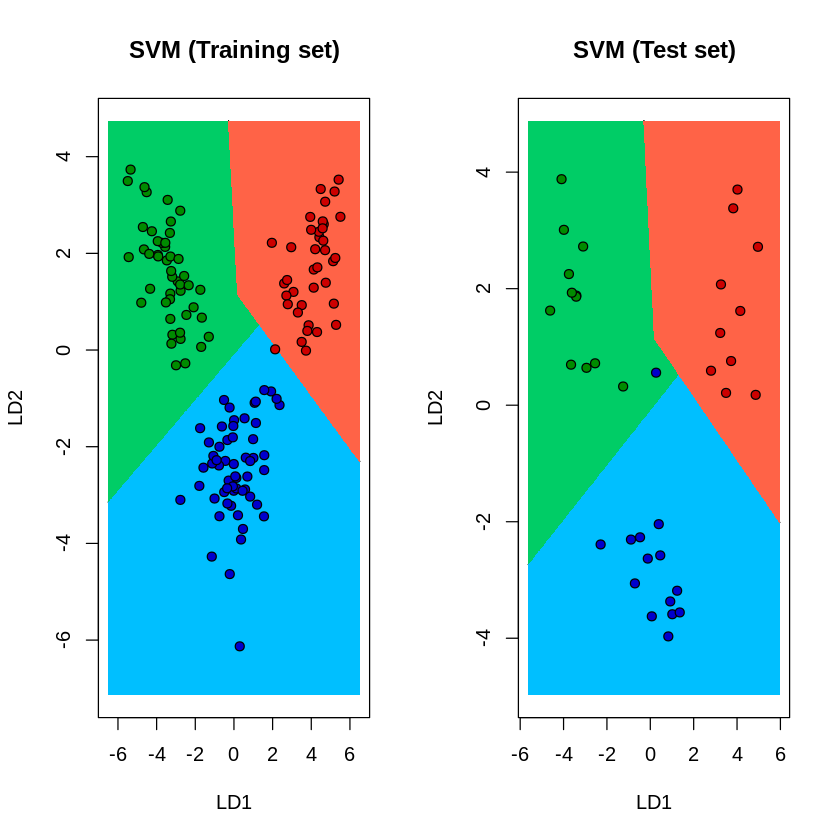

In [12]:
# Visualising the Training set results
par(mfrow=c(1,2))
set = training_set_lda
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier_lda, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))
# Visualising the Test set results
set = test_set_lda
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier_lda, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

**Results**

In [13]:
print('pca success in %')
sum(diag(cm_pca))/sum(cm_pca)*100
print('lda success in %')
sum(diag(cm_lda))/sum(cm_lda)*100

[1] "pca success in %"


[1] 100

[1] "lda success in %"


[1] 97.22222